# Data Analysis



In [ ]:
import kagglehub

path = kagglehub.dataset_download("jainaru/thyroid-disease-data")

print("Path to dataset files:", path)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(f"{path}/Thyroid_Diff.csv")

In [6]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

**Data Visualization**

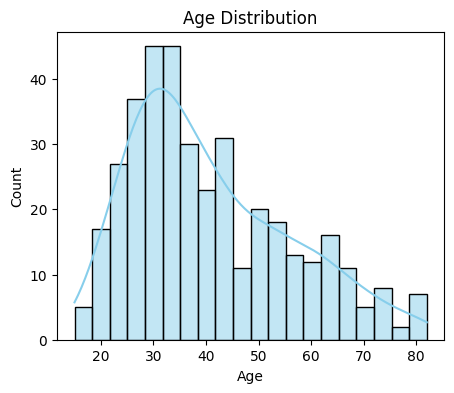

In [9]:
# age
plt.figure(figsize = (5, 4))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

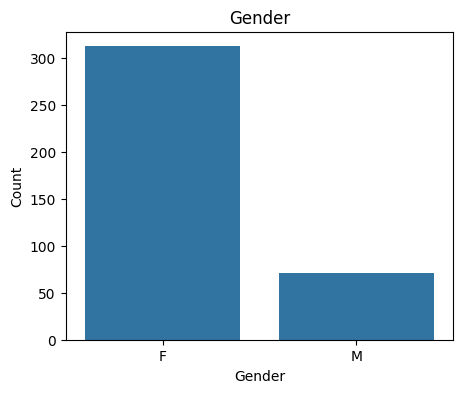

In [10]:
# gender
plt.figure(figsize = (5, 4))
sns.countplot(df, x = 'Gender')
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

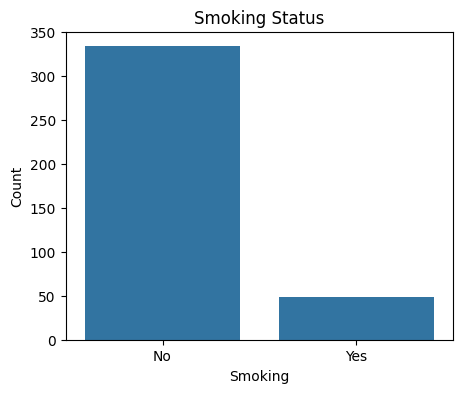

In [11]:
# smoking status
plt.figure(figsize = (5, 4))
sns.countplot(df, x = 'Smoking')
plt.title('Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

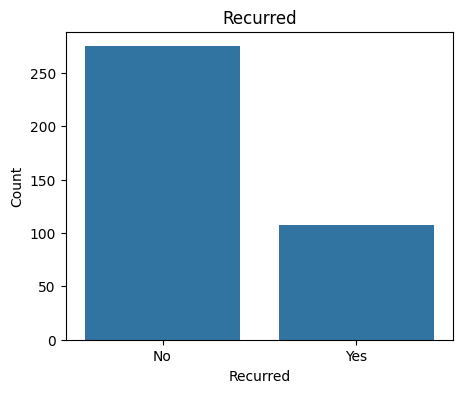

In [12]:
# recurred
plt.figure(figsize = (5, 4))
sns.countplot(df, x = 'Recurred')
plt.title('Recurred')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

In [13]:
df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
df["Gender"] = l_encoder.fit_transform(df["Gender"])

In [15]:
df["Gender"].value_counts()
# 0 for female, 1 for male

Gender
0    312
1     71
Name: count, dtype: int64

In [16]:
df["Smoking"] = l_encoder.fit_transform(df["Smoking"])

In [17]:
df["Smoking"].value_counts()
# 0 for true, 1 for false

Smoking
0    334
1     49
Name: count, dtype: int64

In [18]:
df["Hx Smoking"] = l_encoder.fit_transform(df["Hx Smoking"])

In [19]:
df["Hx Smoking"].value_counts()
# 0 for false, 1 for true

Hx Smoking
0    355
1     28
Name: count, dtype: int64

In [20]:
df["Hx Radiothreapy"] = l_encoder.fit_transform(df["Hx Radiothreapy"])

In [21]:
df["Hx Radiothreapy"].value_counts()
# 0 for false, 1 for true

Hx Radiothreapy
0    376
1      7
Name: count, dtype: int64

In [22]:
df.sample(4)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
46,31,0,0,0,0,Clinical Hypothyroidism,Multinodular goiter,No,Micropapillary,Uni-Focal,Intermediate,T1a,N0,M0,I,Excellent,No
370,78,1,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,No,Follicular,Multi-Focal,High,T4a,N0,M1,IVB,Structural Incomplete,Yes
271,45,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
286,58,0,0,0,0,Clinical Hyperthyroidism,Multinodular goiter,No,Follicular,Multi-Focal,Intermediate,T3a,N0,M0,II,Indeterminate,No


In [23]:
df["Thyroid Function"].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [24]:
df["Thyroid Function"].value_counts()

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

In [25]:
df["Physical Examination"].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [26]:
df["Risk"].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

o_encoder = OrdinalEncoder(categories=[['Low', 'Intermediate', 'High']])
df["Risk"] = o_encoder.fit_transform(df[["Risk"]])

In [28]:
df["Risk"].unique()

array([0., 1., 2.])

In [29]:
df["T"].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [30]:
df["N"].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [31]:
df["M"].unique()

array(['M0', 'M1'], dtype=object)

In [32]:
df["M"] = l_encoder.fit_transform(df["M"])

In [33]:
df["M"].value_counts()
# 0 for MO, 1 for M1

M
0    365
1     18
Name: count, dtype: int64

In [34]:
o2_encoder = OrdinalEncoder(categories=[['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b']])
df["T"] = o2_encoder.fit_transform(df[["T"]])

In [35]:
df["T"].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [36]:
o3_encoder = OrdinalEncoder(categories=[['N0', 'N1b', 'N1a']])
df["N"] = o3_encoder.fit_transform(df[["N"]])

In [37]:
df["N"].value_counts()

N
0.0    268
1.0     93
2.0     22
Name: count, dtype: int64

In [38]:
df["Stage"].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [39]:
o4_encoder = OrdinalEncoder(categories=[['I', 'II', 'III', 'IVA', 'IVB']])
df["Stage"] = o4_encoder.fit_transform(df[["Stage"]])

In [40]:
df["Stage"].value_counts()

Stage
0.0    333
1.0     32
4.0     11
2.0      4
3.0      3
Name: count, dtype: int64

In [41]:
df.sample(3)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
109,60,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,0.0,2.0,0.0,0,0.0,Biochemical Incomplete,No
274,28,1,1,0,0,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,0.0,3.0,0.0,0,0.0,Indeterminate,No
166,31,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,0.0,2.0,0.0,0,0.0,Excellent,No


In [42]:
df["Response"].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [43]:
df["Recurred"].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
df["Recurred"] = l_encoder.fit_transform(df["Recurred"])

In [45]:
df["Recurred"].value_counts()
# 0 for false, 1 for true

Recurred
0    275
1    108
Name: count, dtype: int64

In [46]:
df["Thyroid Function"].unique()

array(['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism'],
      dtype=object)

In [47]:
df["Thyroid Function"].value_counts()

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

In [48]:
o5_encoder = OrdinalEncoder(categories=[["Euthyroid", "Subclinical Hypothyroidism", "Clinical Hypothyroidism", "Subclinical Hyperthyroidism", "Clinical Hyperthyroidism"]])
df["Thyroid Function"] = o5_encoder.fit_transform(df[["Thyroid Function"]])

In [49]:
df["Physical Examination"].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [50]:
df["Physical Examination"] = df["Physical Examination"].replace({
    'Single nodular goiter-left': 'Single nodular goiter',
    'Single nodular goiter-right': 'Single nodular goiter'
})

In [51]:
df["Physical Examination"].unique()

array(['Single nodular goiter', 'Multinodular goiter', 'Normal',
       'Diffuse goiter'], dtype=object)

In [52]:
o6_encoder = OrdinalEncoder(categories=[["Normal", "Diffuse goiter", "Single nodular goiter", "Multinodular goiter"]])
df["Physical Examination"] = o6_encoder.fit_transform(df[["Physical Examination"]])

In [53]:
df["Physical Examination"].unique()

array([2., 3., 0., 1.])

In [54]:
df["Focality"].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [55]:
df["Focality"] = l_encoder.fit_transform(df["Focality"])

In [56]:
df["Focality"].value_counts()
# 1 for Uni-Focal, 0 fro Multi-Focal

Focality
1    247
0    136
Name: count, dtype: int64

In [57]:
df["Adenopathy"].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [58]:
df = pd.get_dummies(df, columns=["Adenopathy"])

In [59]:
df["Pathology"].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [60]:
df = pd.get_dummies(df, columns=["Pathology"])

In [61]:
df = pd.get_dummies(df, columns=["Response"])

In [62]:
X = df.drop("Recurred", axis=1)
y = df["Recurred"]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification

**Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print("confusion matrix : \n\n",confusion_matrix(y_pred, y_test), "\n")
print("classification report : \n\n" ,classification_report(y_pred, y_test))

confusion matrix : 

 [[58  1]
 [ 0 18]] 

classification report : 

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.95      1.00      0.97        18

    accuracy                           0.99        77
   macro avg       0.97      0.99      0.98        77
weighted avg       0.99      0.99      0.99        77



**Support Vektor Machine**


In [67]:
from sklearn.svm import SVC
dvm = SVC()
dvm.fit(X_train, y_train)
y_pred2 = dvm.predict(X_test)
print("confusion matrix : \n\n",confusion_matrix(y_pred2, y_test), "\n")
print("classification report : \n\n" ,classification_report(y_pred2, y_test))

confusion matrix : 

 [[58  2]
 [ 0 17]] 

classification report : 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.89      1.00      0.94        17

    accuracy                           0.97        77
   macro avg       0.95      0.98      0.96        77
weighted avg       0.98      0.97      0.97        77



**Hyperparameter Tuning**

In [68]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', "linear", "poly", "sigmoid", ]
}

In [69]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold()
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=cv, verbose=1)
grid.fit(X_train, y_train)
y_pred3 = grid.predict(X_test)
grid.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [70]:
print("confusion matrix : \n\n",confusion_matrix(y_pred3, y_test), "\n")
print("classification report : \n\n" ,classification_report(y_pred3, y_test))

confusion matrix : 

 [[58  3]
 [ 0 16]] 

classification report : 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.84      1.00      0.91        16

    accuracy                           0.96        77
   macro avg       0.92      0.98      0.94        77
weighted avg       0.97      0.96      0.96        77



**Naive Bayes**

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test);
print("confusion matrix : \n\n",confusion_matrix(y_pred_gnb, y_test), "\n")
print("classification report : \n\n" ,classification_report(y_pred_gnb, y_test))

confusion matrix : 

 [[58  2]
 [ 0 17]] 

classification report : 

               precision    recall  f1-score   support

           0       1.00      0.97      0.98        60
           1       0.89      1.00      0.94        17

    accuracy                           0.97        77
   macro avg       0.95      0.98      0.96        77
weighted avg       0.98      0.97      0.97        77



**KNeighbors Classifier**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("confusion matrix : \n\n",confusion_matrix(y_pred_knn, y_test), "\n")
print("classification report : \n\n" ,classification_report(y_pred_knn, y_test))

confusion matrix : 

 [[58  3]
 [ 0 16]] 

classification report : 

               precision    recall  f1-score   support

           0       1.00      0.95      0.97        61
           1       0.84      1.00      0.91        16

    accuracy                           0.96        77
   macro avg       0.92      0.98      0.94        77
weighted avg       0.97      0.96      0.96        77

